<style TYPE="text/css">
code.has-jax {font: inherit; font-size: 100%; background: inherit; border: inherit;}
</style>
<script type="text/x-mathjax-config">
MathJax.Hub.Config({
    tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        skipTags: ['script', 'noscript', 'style', 'textarea', 'pre'] // removed 'code' entry
    }
});
MathJax.Hub.Queue(function() {
    var all = MathJax.Hub.getAllJax(), i;
    for(i = 0; i < all.length; i += 1) {
        all[i].SourceElement().parentNode.className += ' has-jax';
    }
});
</script>
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>

## Notation

* Let each data point, $ x_i $ consist of $ d $ features. Therefore each $ \quad x_i  \in  \! \mathbb{R}^{d} $


* Let our target label, $ y_i $ be binary (binary classification) or a real valued number (regression).  Therefore $ \quad y_i  \in  \! \{0, 1\} $ or $ \mathbb{R} $


* Let us have $m$ tuples of $ (x_i, y_i) $


* Therefore Data Inputs, X is of the shape $(m, d)$


* And y is of the shape $(m, 1)$

## Perceptron



* Fundamental units of neural network 


* Are able to separate any linear separable data


* $ \hat{y} = \phi (X.W + b) $ where $ \phi(x) = 0 $ if $ x < 0 $ else $ \phi(x) = 1 $

![Alt](Perceptron.png "Perceptron")
 

## Multilayer Perceptron


* Stacks of Perceptrons forms a layer


* Multiple such layers form a Multi Layer Perceptron or a Neural Network. 


* Output is computed in a series of steps which is called forward propagation

![Alt](Neural Network.png "Perceptron")

## More notation

* A neural network is said of have **L** layers if
    * **1**         Input layer, 
    * **L - 1**     Hidden layer,
    * **1**         Output layer


* The parameters of the Neural Network (which are learnt from the data) are called the **weights** and the **biases**.



* The weights between layer $ l-1 $ and layer $ l $ are represented by $ W^{[l]} $ and the biases are represented by $ b ^ {[l]}$ 



* Each "neuron" in the hidden and the output layer can be decomposed into $ z $ and $ a $. The neurons of the next layer are calculated from the previous ones by using the following equations.

$$ z^{[l]} = a^{[l-1]} . W^{[l]} + b^{[l]} $$

$$ a^{[l]} = f(z^{[l]}) $$


* Here, $ f $ is any non linearity (sigmoid, relu, leaky-relu, tanh, etc.)


* Convention:

$$ a^{[0]} = X $$

$$ a^{[L]} = \hat{y} $$


## Dimensions


* Let the dimension of layer $ l $ be $ s^{[l]} $. By dimension of a layer we mean the number of neurons in the layer.


* The dimension of $ W^{[l]} $ is given by $ (s^{[l-1]}, s^{[l]}) $ and of $ b^{[l]} $ is given by $(1, s^{[l]})$

## Sanity check

$$ z^{[l]} = a^{[l-1]} . W^{[l]} + b^{[l]} $$


* Consider the above equation. Are the shape of the left hand side and the right hand the same?



* When you multiply $ a^{[l-1]} . W^{[l]} $ the shape of the resultant matrix is that when you multiply $ (m, s^{[l-1]}) $ and $ (s^{[l-1]}, s^{[l]}) $ which is  $ (m, s^{[l]}) $.


* Now when you add $ b^{[l]} $ a vector of shape $ (1, s^{[l]}) $ numpy (and tensorflow) broadcasts it into the other dimension. It basically copies $ b^{[l]} \; m $ times add then adds to the matrix product and hence the final result has a size of $ (m, s^{[l]}) $

## Forward Propagation

* For loop over the layers so as to calculate the activations of intermediate layers.



* For l = 1 to L do:
    * $ z^{[l]} = a^{[l-1]} . W^{[l]} + b^{[l]} $

    * $ a^{[l]} = f(z^{[l]}) $

## TRAINING

## (Mini)Batch Gradient Descent

* Mean Square Error: 
    * When optimizing using stochastic gradient descent, one calculates the error term for one particular instance (say with index $i$)
    
        $$ J_i(y_i, \hat{y}_i) = \frac{1}{2} * (y_i - \hat{y}_i) ^ {2} $$
    
    * A random instance isn't always a good estimate of the gradient, so we use some ( > 1) or all (m) of the instances and calculate the error value
    
        $$ J =  \frac{1}{m} * \sum_{i=1}^{m}{J_i} $$

* Gradient update rule:
    * Stochastic:
    
        $$ \theta_t = \theta_{t-1} - \eta* \nabla_\theta J_i $$
    
    * (Mini)Batch:
    
        $$ \theta_t = \theta_{t-1} - \eta* \nabla_\theta J = \theta_{t-1} - \eta* \nabla_\theta{\frac{1}{m} * \sum_{i=1}^{m}{J_i}} = \theta_{t-1} - \frac{\eta}{m} * \sum_{i=1}^{m}{\nabla_\theta{J_i}} $$

## Derivative wrt $ \hat{y}$


* Required for back propagation  $$ \frac{\partial J}{\partial \hat{y}} = \frac{\partial J}{\partial a^{[L]}} $$


* Often a very simple vector. For example, when J is MSE, $$ \frac{\partial J}{\partial \hat{y}} = \frac{1}{m}* (\hat{y} - y) $$


* Derivation:


$$ \frac{\partial J}{\partial \hat{y}} = \Big(\frac{\partial J}{\partial \hat{y}_1}, \; \frac{\partial J}{\partial \hat{y}_2}, . \; . \;. ,\; \frac{\partial J}{\partial \hat{y}_m}\Big) $$


 $$ \frac{\partial J}{\partial \hat{y}} = \Big(\frac{1}{m}*\frac{\partial J_1}{\partial \hat{y}_1}, \; \frac{1}{m}*\frac{\partial J_2}{\partial \hat{y}_2}, . \; . \;. , \; \frac{1}{m}*\frac{\partial J_m}{\partial \hat{y}_m}\Big) $$


$$ \frac{\partial J}{\partial \hat{y}} = \Big(\frac{1}{m}*(\hat{y}_1 - y_1), \; \frac{1}{m}*(\hat{y}_2 - y_2), . \; . \;. , \; \frac{1}{m}*(\hat{y}_m - y_m)\Big) $$


$$ \frac{\partial J}{\partial \hat{y}} = \frac{1}{m}* (\hat{y} - y) $$

## Deriving Back Propagation for Single Input Instance

* $ m = 1 $


* Consider the following equation: $ z^{[l]} = a^{[l-1]} . W^{[l]} + b^{[l]} $


* For simplicity, $ z = a . W + b $


* Dimensions: $ z: (1, q) \quad a: (1, p) \quad W: (p, q) \quad b: (1, q) $


* Therefore, $z_i = \sum_{j=1}^{q}{(a_j*W_{j i})} + b_i = a.w_{:, i}^{T} + b_i$


* Assume you know, $$ \delta = \frac{\partial J}{\partial z} = \Big(\frac{\partial J}{\partial z_1}, \; \frac{\partial J}{\partial z_2}, . \; . \;. ,\; \frac{\partial J}{\partial z_q}\Big) $$


* $$ \frac{\partial J}{\partial b} = \Big(\frac{\partial J}{\partial b_1}, \; \frac{\partial J}{\partial b_2}, . \; . \;. ,\; \frac{\partial J}{\partial b_q}\Big) $$

$$ \frac{\partial J}{\partial b} = \Big(\frac{\partial J}{\partial z_1} * \frac{\partial z_1}{\partial b_1}, \; \frac{\partial J}{\partial z_2}*\frac{\partial z_2}{\partial b_2}, . \; . \;. ,\; \frac{\partial J}{\partial z_q}*\frac{\partial z_q}{\partial b_q}\Big) $$

$$ \frac{\partial J}{\partial b} = \Big(\frac{\partial J}{\partial z_1} * 1, \; \frac{\partial J}{\partial z_2}*1, . \; . \;. ,\; \frac{\partial J}{\partial z_q}*1\Big) $$

$$ \frac{\partial J}{\partial b} = \delta $$

## Back Propagation Algorithm for Batch Inputs



* Based on the chain rule of differentiation



* Notation: $$ \delta^{[l]} = \frac{\partial J}{\partial z^{[l]}} $$ 


* We know:
 $$ \delta^{[L]} = \frac{\partial J}{\partial a^{[L]}}  \frac{\partial a^{[L]}}{\partial z^{[L]}} = \frac{\partial J}{\partial a^{[L]}} \circ f^{'}(z^{[L]})$$

* FOR $l = L$ down to $1$:
    * $$ dW^{[l]} = \frac{\partial J}{\partial W^{[l]}} =  \frac{\partial J}{\partial z^{[l]}} \frac{\partial z^{[l]}}{\partial W^{[l]}} = (a^{[l-1]})^{T}.\delta^{[l]}$$
    * $$ db^{[l]} = \frac{\partial J}{\partial b^{[l]}} = \frac{\partial J}{\partial z^{[l]}} \frac{\partial z^{[l]}}{\partial b^{[l]}} = \sum_{i=1}^{m}{\delta^{[l]}_{(i:)}}$$
    * $$ da^{[l-1]} = \frac{\partial J}{\partial a^{[l-1]}} = \frac{\partial J}{\partial z^{[l]}} \frac{\partial z^{[l]}}{\partial a^{[l-1]}} = \delta^{[l]}.(W^{[l]})^{T} $$
    * $$ \delta^{[l-1]} = \frac{\partial J}{\partial z^{[l-1]}} = \frac{\partial J}{\partial a^{[l-1]}}\frac{\partial a^{[l-1]}}{\partial z^{[l-1]}} = \frac{\partial J}{\partial a^{[l-1]}} \circ f^{'}(z^{[l-1]}) $$

## CODE

#### Inspired from Andrew Ng's first course in Deep Learning Specialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task: Regression

### Dataset

In [2]:
x = np.linspace(-1, 1, 400).reshape(400, 1)
y = (0.2*np.log(1 + np.exp(x)) - 2*x**2 + 0.5*np.exp(x) + 4*x**3).reshape(400, 1)

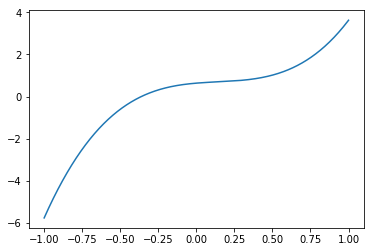

In [3]:
plt.plot(x, y)

### Scaling 

* Scale the $y$ to be in between [-1, 1].

* Usually techniques like min-max scaling are used. Here, lets just divide y by $ max \; |y| $ i.e $ 6 $

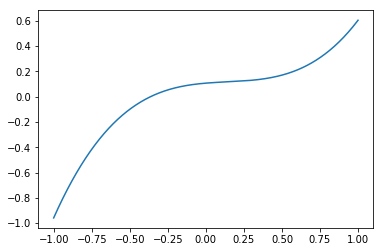

In [4]:
y /= 6
plt.plot(x, y)

### The above line is what we desire. We have been give noisy training data.

In [5]:
x_data = x
y_data = (y + 0.1*np.random.randn(y.shape[0], y.shape[1]))

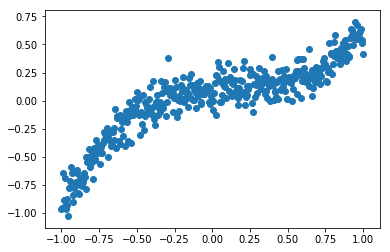

In [6]:
plt.scatter(x_data, y_data)

## Model: MLP

### Initialise the parameters (using He initialization). 

* Random initialization v/s he initialization: 
    * https://towardsdatascience.com/random-initialization-for-neural-networks-a-thing-of-the-past-bfcdd806bf9e


* $ W^{[l]} \sim \mathcal{N}. (s^{[l-1]},s^{[l]}) *\sqrt{\frac{2}{s^{[l-1]}}} $

* $ b^{[l]} = Zeros(1, s^{[l]})$

In [7]:
def initialize_parameters(layer_dims): 
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    
    ## He initialization
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l-1], layer_dims[l]) \
        * np.sqrt(2.0 / layer_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((1, layer_dims[l]))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l-1], layer_dims[l]))
        assert(parameters['b' + str(l)].shape == (1, layer_dims[l]))
        
    return parameters

### Forward Propagation

* Define a cache to be a two tuple

* Need it to perform back propagation 

* cache = (linear cache, activation cache)

* linear_cache: $ \; (a^{[l-1]}, W^{[l]}, b^{[l]}) $

* activation_cache: $ \; {z^{[l]}} $

In [8]:
def relu(Z):
    return np.maximum(0, Z)

## Inputs: Previous layer activation (A), Weights and biases.
def linear_activation_forward(A, W, b, activation):
    
    # Calculate Z 
    Z_next = np.dot(A, W) + b
    
    # Define Linear and Activation Cache
    linear_cache = (A, W, b)
    activation_cache = Z_next
    cache = (linear_cache, activation_cache)
    
    if activation is not None:
        A_next = activation(Z_next)
    else:
        A_next = Z_next
    
    assert(Z_next.shape == (A.shape[0], W.shape[1]))
    assert(A_next.shape == Z_next.shape)
    
    
    return A_next, cache

## Iterate through all the layers using linear_activation_forward
def L_model_forward(X, parameters, activation):
    caches = []
    ## What is A^[0]
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation)
        caches.append(cache)
    
    ## For the last layer don't use any activation function
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], None)
    caches.append(cache)
    
    return AL, caches

### Back Propagation

In [9]:
## Differentiation of relu activation function. Assume at zero derivative = 1
## Recall that activation_cache is just Z.
## Given dJ/da and Z what is dJ/dz?

def relu_backward(dA, activation_cache):
    return dA * (activation_cache >= 0).astype(np.float32)

## Inputs: dA, cache and activation function
## Use relu backward to calculate dZ when dA is given
## And then calculate dW, db and dA_prev

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    ## Calculate dZ
    if activation == relu:
        dZ = relu_backward(dA, activation_cache)
    if activation == None:
        dZ = dA
    assert(dZ.shape == dA.shape)
    
    ## Calculate dA_prev, dW and db
    A_prev, W, b = linear_cache
    
    dW = np.dot(A_prev.T, dZ)
    db = np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ, W.T)
    
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev, dW, db

In [10]:
# Iterating back through the layers
def L_model_backward(AL, dAL, caches, activation):
    grads = {}
    L = len(caches) # the number of layers
    grads["dA"+str(L)] = dAL
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = None)

    for l in reversed(range(1, L)):
        current_cache = caches[l-1]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l)], current_cache, activation)
        grads["dA" + str(l-1)] = dA_prev_temp
        grads["dW" + str(l)] = dW_temp
        grads["db" + str(l)] = db_temp
    return grads

In [11]:
## Gradient descent step
def update_parameters(parameters, grads,learning_rate):
    L = len(parameters) // 2                 # number of layers in the neural networks
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters

In [12]:
## Return the cost as well as gradient of cost with respect to y_hat
def MSE_Cost(y_pred, y_true):
    m = float(y_true.shape[0])
    return 0.5 * np.mean((y_pred - y_true)**2), (y_pred - y_true) / m

In [13]:
## Define your architecture using Layer_dims. 
## Remember input_layer and output_layer's dimensions depend on the problem you're trying to solve
LAYER_DIMS = [1, 64, 64, 64, 1]
parameters = initialize_parameters(LAYER_DIMS)

In [14]:
ITERATIONS = 3000
LEARNING_RATE = 0.01

In [15]:
costs = []

### Gradient Checker
* Use this to verify if the gradients returned by your backpropagation implementation are correct

In [21]:
def gradient_checker():
    global x_data, y_data
    epsilon = 1e-4
    parameters = initialize_parameters(LAYER_DIMS)
    parameters_copy = parameters
    AL, caches = L_model_forward(x_data, parameters, activation=relu)
    cost, dAL = MSE_Cost(AL, y_data)
    gradients = L_model_backward(AL, dAL, caches, activation=relu)
    L = len(parameters) // 2 
    for l in range(1, L+1):
        W = parameters["W" + str(l)]
        s_lm1, s_l = W.shape
        i = np.random.randint(s_lm1)
        j = np.random.randint(s_l)
        grad_actual = gradients["dW"+str(l)][i, j]
        W_plus = np.copy(W)
        W_plus[i, j] += epsilon
        parameters_copy["W" + str(l)] = W_plus
        AL, caches = L_model_forward(x_data, parameters_copy, activation=relu)
        cost_plus, dAL = MSE_Cost(AL, y_data)
        W_minus = W_plus
        W_minus[i, j] -= 2*epsilon
        parameters_copy["W" + str(l)] = W_minus
        AL, caches = L_model_forward(x_data, parameters_copy, activation=relu)
        cost_minus, dAL = MSE_Cost(AL, y_data)
        grad_estimated = (cost_plus - cost_minus) / (2 * epsilon)
        print(abs(grad_estimated - grad_actual))
        parameters_copy["W" + str(l)] = W

In [22]:
gradient_checker()

7.796541190430162e-14
0.0
0.0
1.1018963519404679e-14


In [18]:
## Training 
for _ in range(ITERATIONS):
    ## Forward pass
    AL, caches = L_model_forward(x_data, parameters, activation=relu)
    
    ## Calculate loss and dAL
    cost, dAL = MSE_Cost(AL, y_data)
    costs.append(cost)
    
    ## Backward pass to get gradients
    gradients = L_model_backward(AL, dAL, caches, activation=relu)
    
    ## Update your parameters
    parameters = update_parameters(parameters, gradients, LEARNING_RATE)

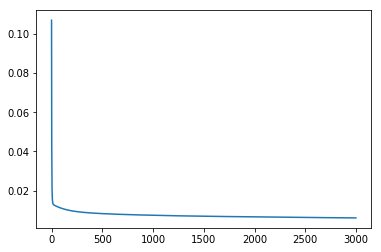

In [19]:
plt.plot(costs)

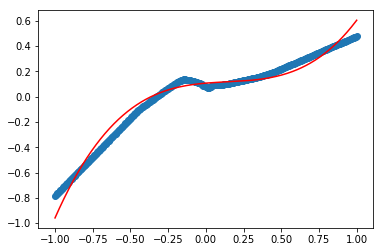

In [20]:
plt.scatter(x_data, AL)
plt.plot(x_data, y, c='r')

Note how the error is more towards the left and the right ends of the data.
There's a theorem in ML, which says that the standard deviations of error increases away from the mean.